In [1]:
import numpy as np
import pandas as pd
import networkx as nx

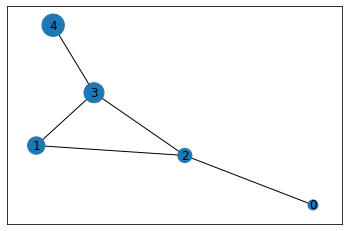

In [31]:
G = nx.Graph()
G.add_edges_from([
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
])
nx.draw_networkx(G, with_labels=True, node_size=[100, 200, 300, 400, 500])

In [61]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

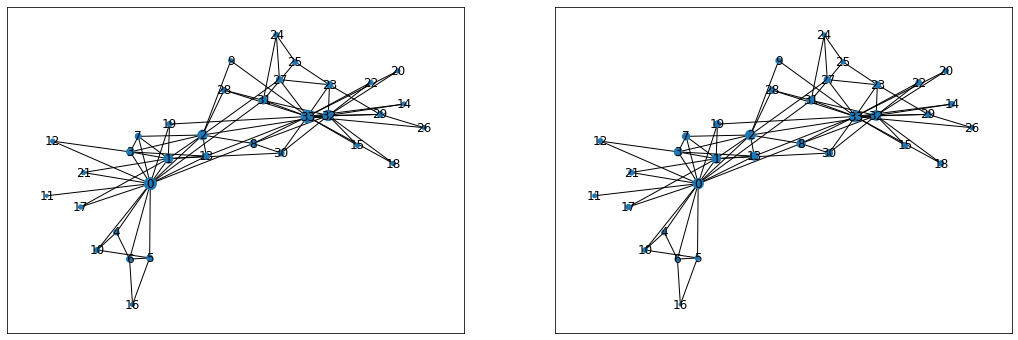

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
degree_centrality = nx.degree_centrality(G)
nx.draw_networkx(G, with_labels=True, node_size=np.array(list(degree_centrality.values())) * 300, ax=axes[0], pos=pos)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
nx.draw_networkx(G, with_labels=True, node_size=np.array(list(eigenvector_centrality.values())) * 300, ax=axes[1], pos=pos)

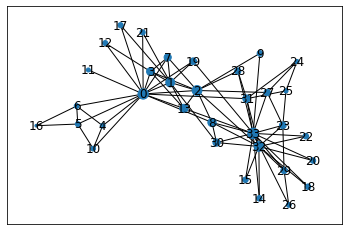

In [63]:
eigenvector_centrality = nx.eigenvector_centrality(G)
nx.draw_networkx(G, with_labels=True, node_size=np.array(list(eigenvector_centrality.values())) * 300)

In [65]:
G = nx.karate_club_graph()
degree_centrality = nx.degree_centrality(G)
degree_centrality = pd.Series(degree_centrality.values(), name="degree")
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
eigenvector_centrality = pd.Series(eigenvector_centrality.values(), name="eigenvector")
centrality = pd.concat([degree_centrality, eigenvector_centrality], axis=1)
centrality

,degree,eigenvector
0,0.484848,0.355491
1,0.272727,0.265960
2,0.303030,0.317193
3,0.181818,0.211180
4,0.090909,0.075969
5,0.121212,0.079483
6,0.121212,0.079483
7,0.121212,0.170960
8,0.151515,0.227404
9,0.060606,0.102674


The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

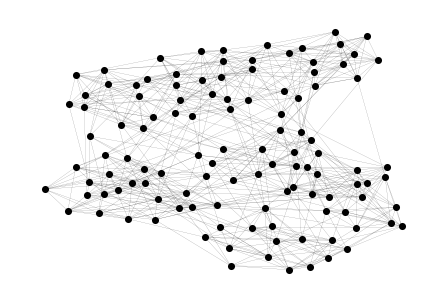

In [66]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [67]:
nx.MultiGraph()

In [68]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=0)
pos

{0: array([-0.08608312,  0.35674596]),
 1: array([-0.10669304,  0.20477623]),
 2: array([-0.06612635,  0.03965846]),
 3: array([-0.2406135,  0.2481614]),
 4: array([0.10655595, 0.60888028]),
 5: array([-0.0755657 ,  0.76935902]),
 6: array([-0.01136205,  0.73449742]),
 7: array([-0.25088574,  0.15759357]),
 8: array([ 0.0472217 , -0.07626688]),
 9: array([ 0.38513712, -0.10531281]),
 10: array([0.10468862, 0.73088794]),
 11: array([-0.27860864,  0.66405851]),
 12: array([-0.4966925 ,  0.35019105]),
 13: array([-0.00950762,  0.09581953]),
 14: array([ 0.18578961, -0.67118183]),
 15: array([ 0.12844744, -0.55763504]),
 16: array([-0.036615,  1.      ]),
 17: array([-0.38425909,  0.49969972]),
 18: array([ 0.4874534, -0.4897098]),
 19: array([0.15477792, 0.20492753]),
 20: array([ 0.01593903, -0.70716658]),
 21: array([-0.21774876,  0.48734977]),
 22: array([ 0.37908922, -0.40309779]),
 23: array([-0.01793822, -0.48426817]),
 24: array([-0.3567273 , -0.43493225]),
 25: array([-0.20280292,

In [69]:
nx.to_numpy_array(G)

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

In [70]:
nx.eigenvector_centrality_numpy(G)

{0: 0.35549144452456655,
 1: 0.2659599195524916,
 2: 0.3171925044864315,
 3: 0.2111797203778901,
 4: 0.0759688181830691,
 5: 0.07948304511709967,
 6: 0.07948304511709968,
 7: 0.1709597480447962,
 8: 0.22740390712540018,
 9: 0.10267425072358613,
 10: 0.07596881818306903,
 11: 0.05285569749352137,
 12: 0.0842546287167138,
 13: 0.22647272014248113,
 14: 0.10140326218952458,
 15: 0.10140326218952463,
 16: 0.02363562810459153,
 17: 0.09239953819570255,
 18: 0.10140326218952458,
 19: 0.14791251029338742,
 20: 0.10140326218952458,
 21: 0.09239953819570265,
 22: 0.1014032621895246,
 23: 0.15011857186115282,
 24: 0.057052440541165664,
 25: 0.05920647491677862,
 26: 0.07557941348827212,
 27: 0.13347715338024008,
 28: 0.1310778229837108,
 29: 0.134960819262328,
 30: 0.17475830231435277,
 31: 0.19103384140654378,
 32: 0.3086442197910473,
 33: 0.37336347029148337}

In [71]:
nx.eigenvector_centrality(G)

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.3171893899684447,
 3: 0.21117407832057059,
 4: 0.0759664588165738,
 5: 0.07948057788594245,
 6: 0.07948057788594245,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637756,
 10: 0.0759664588165738,
 11: 0.052854169452336466,
 12: 0.08425192086558085,
 13: 0.22646969838808145,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.02363479426059687,
 17: 0.09239675666845952,
 18: 0.10140627846270832,
 19: 0.14791134007618664,
 20: 0.10140627846270832,
 21: 0.09239675666845952,
 22: 0.10140627846270832,
 23: 0.15012328691726784,
 24: 0.05705373563802805,
 25: 0.059208202502790096,
 26: 0.07558192219009324,
 27: 0.13347932684333305,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.191036269797917,
 32: 0.30865104773369595,
 33: 0.373371213013235}

In [72]:
G = nx.gnp_random_graph(100, 0.02, seed=10374196)
G = nx.fast_gnp_random_graph()
nx.draw(G)

TypeError: argmap_fast_gnp_random_graph_21() missing 2 required positional arguments: 'n' and 'p'

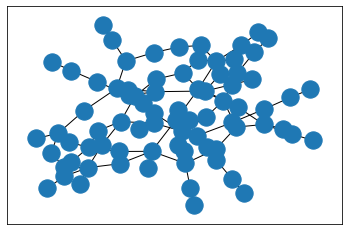

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=0)
nx.draw_networkx_nodes(Gcc, pos=pos, ax=ax)
nx.draw_networkx_edges(Gcc, pos, ax=ax)

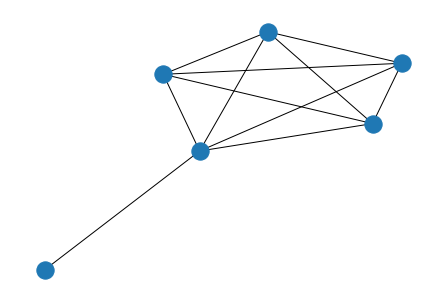

In [ ]:
G = nx.random_internet_as_graph(5, seed=0)
nx.draw(G)

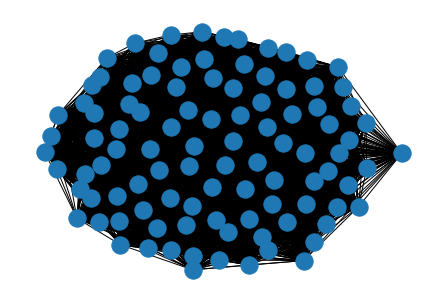

In [ ]:
G = nx.random_geometric_graph(100, 1)
nx.draw(G)

TypeError: 'AdjacencyView' object is not callable